<font size="5.8">Summary</font>  

**Customer churn** is a financial expression referring to losing of a customer or client when a customer abandons interaction with business or company. Similarly, the  

**churn rate** is defined as the rate of customers leaving a company within a specific time duration. Low churn rate can be an indicator of success for companies so they try to retain as many customers as they can.


With the advent of machine learning deep learning techniques, companies can identify potential customers who may stop doing business with them in the near future. Strategies can be applied to retain those costumers.


In this work, customer churn is predicted for a bank based on different customer attributes including geography, age, gender, income and more. The data set can be downloaded from [Kaggle](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling/version/1) named *Churn_Modelling.csv*. More details about data will be discussed in later section.

<font size="5.8">Required Libraries for this work</font>  

In [1]:
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import time
import zipfile
from IPython.display import HTML
from IPython.display import display, Math, Latex
import pickle
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import PercentFormatter
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import recall_score
import logging
from matplotlib import gridspec
import matplotlib.patheffects as pe
import matplotlib.ticker as mtick
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Methodology" data-toc-modified-id="Methodology-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Methodology</a></span></li><li><span><a href="#Data-Processing" data-toc-modified-id="Data-Processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Processing</a></span><ul class="toc-item"><li><span><a href="#Divide-Data-into-Training-set-(80%)-and-Test-set-(20%)" data-toc-modified-id="Divide-Data-into-Training-set-(80%)-and-Test-set-(20%)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Divide Data into Training set (80%) and Test set (20%)</a></span></li><li><span><a href="#Text-Handeling" data-toc-modified-id="Text-Handeling-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Text Handeling</a></span></li><li><span><a href="#Impute-Missing-Values" data-toc-modified-id="Impute-Missing-Values-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Impute Missing Values</a></span></li><li><span><a href="#Standardization" data-toc-modified-id="Standardization-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Standardization</a></span></li></ul></li><li><span><a href="#Predictive-Models" data-toc-modified-id="Predictive-Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Predictive Models</a></span><ul class="toc-item"><li><span><a href="#Performance-Measurement" data-toc-modified-id="Performance-Measurement-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Performance Measurement</a></span></li><li><span><a href="#Dummy-Classifier" data-toc-modified-id="Dummy-Classifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Dummy Classifier</a></span></li><li><span><a href="#Stochastic-Gradient-Descent" data-toc-modified-id="Stochastic-Gradient-Descent-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Stochastic Gradient Descent</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Support Vector Machine</a></span></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Decision Trees</a></span><ul class="toc-item"><li><span><a href="#Flowchart-of-Decision-Tree-for-Prediction" data-toc-modified-id="Flowchart-of-Decision-Tree-for-Prediction-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Flowchart of Decision Tree for Prediction</a></span></li></ul></li><li><span><a href="#Adaptive-Boosting-with-Decision-Trees" data-toc-modified-id="Adaptive-Boosting-with-Decision-Trees-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Adaptive Boosting with Decision Trees</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#Random-Forest-Feature-Importance" data-toc-modified-id="Random-Forest-Feature-Importance-3.8.1"><span class="toc-item-num">3.8.1&nbsp;&nbsp;</span>Random Forest Feature Importance</a></span></li></ul></li><li><span><a href="#Neural-Network" data-toc-modified-id="Neural-Network-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Neural Network</a></span><ul class="toc-item"><li><span><a href="#Bootstraping-(Neural-Network)" data-toc-modified-id="Bootstraping-(Neural-Network)-3.9.1"><span class="toc-item-num">3.9.1&nbsp;&nbsp;</span>Bootstraping (Neural Network)</a></span></li></ul></li></ul></li><li><span><a href="#ROC-Chart--for-Training-set" data-toc-modified-id="ROC-Chart--for-Training-set-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ROC Chart  for Training set</a></span></li><li><span><a href="#Performance-of-the-Models-on-Training-Set" data-toc-modified-id="Performance-of-the-Models-on-Training-Set-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Performance of the Models on Training Set</a></span></li><li><span><a href="#Test-Set" data-toc-modified-id="Test-Set-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Test Set</a></span><ul class="toc-item"><li><span><a href="#Prediction-on-Never-Seen-before-Data" data-toc-modified-id="Prediction-on-Never-Seen-before-Data-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Prediction on Never Seen before Data</a></span></li></ul></li><li><span><a href="#Train-Final-Model-with-all-Data" data-toc-modified-id="Train-Final-Model-with-all-Data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Train Final Model with all Data</a></span></li><li><span><a href="#Appendix-(Required-Python-Functions)" data-toc-modified-id="Appendix-(Required-Python-Functions)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Appendix (Required Python Functions)</a></span></li></ul></div>

# Methodology

A binary classification will be applied *Churn_Modelling.csv* downloaded from [Kaggle](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling/version/1): the target feature is *Exited* (0 and 1). The following steps will be applied:

- The irrelevant features are removed from data (we do not need customer's name, customer's ID). The linear correlation between features and target are calculated or run Random Forest analysis to rank the importance of features to predict the target. 


- The data set is divided into 80% training set and 20% test set.  The test set is only applied at the end as a never-before-seen dataset to only evaluate the trained models and make sure the models are not overfitted and no information leaks occur (see Figure below). 

<p>&nbsp;</p>
<img src="https://raw.githubusercontent.com/MehdiRezvandehy/Machine-Learning-Course-University-of-Calgary/master/Images/fig1_churn.png " alt="drawing" width="800"/>
<p>&nbsp;</p>

- Data processing is applied for training set including imputation of missing values, normalization and text handling. The data is clean up and get ready to feed ML algorithms.


- Train ML algorithms mentioned above using the training set by implementing a binary classification. Each algorithm is optimized by fine-tuning the hyperparameters. To avoid overfitting, K-fold cross validation is applied. The training set (we do not touch test set) into 3-folds (k=3); each model is trained with 2 folds and  apply prediction for 1-folds. The process is repeated for all 3 folds to apply prediction for all training set. This leads to prevent overfitting and have a clean prediction (See Figure below). Therefore, performance of the algorithms can be measured for the training set and compared with other since the same data is fed to each algorithms. 

<p>&nbsp;</p>
<img src="https://raw.githubusercontent.com/MehdiRezvandehy/Machine-Learning-Course-University-of-Calgary/master/Images/fig2_churn.png " alt="drawing" width="700"/>

- The trained models are applied to predict test set to confirm the performances make sure there is  no overfitting. The models have not seen the test sets during the training so the resulted performance for test set can be an indication of performance for future prediction of these models. The same data processing for training set should be applied for test set. The same statistics for imputation of training set should be applied for test set. 


# Data Processing 

In [3]:
# Read data 'Churn_Modelling.csv'
df = pd.read_csv('Churn_Modelling.csv')

# Shuffle the data
np.random.seed(32) 
df=df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True) # Reset index

# Remove 'RowNumber','CustomerId','Surname' features that are un
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=False)

## Divide Data into Training set (80%) and Test set (20%)

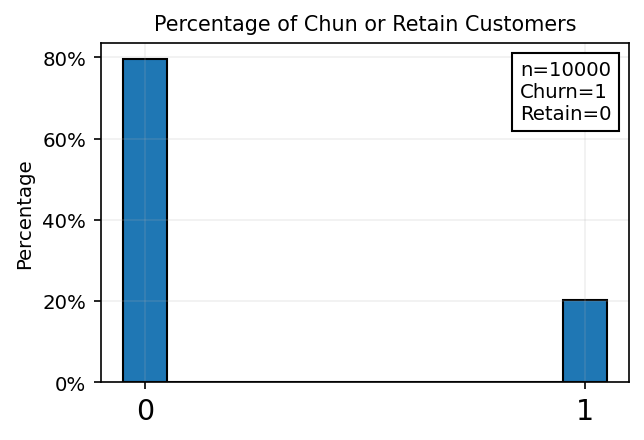

In [4]:
font = {'size'   : 9.5}
plt.rc('font', **font)
fig = plt.subplots(figsize=(10, 3), dpi= 150, facecolor='w', edgecolor='k')
ax1=plt.subplot(1,2,1)
histplt(df['Exited'],bins=5,title="Percentage of Chun or Retain Customers",xlabl="",xlimt=(-0.1,1.1),axt=ax1)
plt.show()

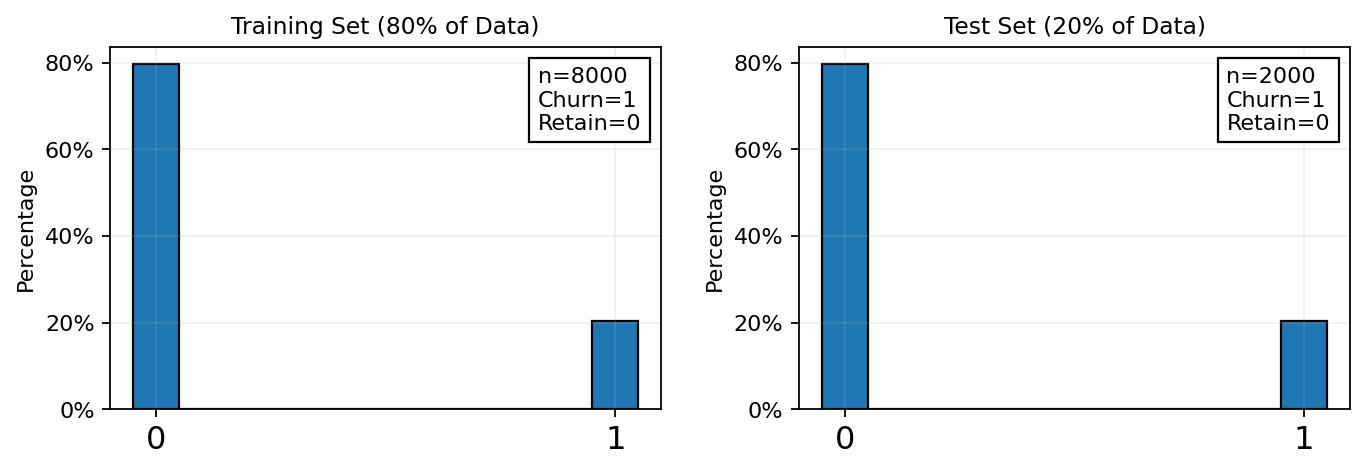

In [5]:
# Training and Test
spt = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in spt.split(df, df['Exited']):
    train_set_strat = df.loc[train_idx]
    test_set_strat  = df.loc[test_idx] 
    
train_set_strat.reset_index(inplace=True, drop=True) # Reset index
test_set_strat.reset_index(inplace=True, drop=True) # Reset index
    
font = {'size'   : 10}
plt.rc('font', **font)

fig = plt.subplots(figsize=(10, 3), dpi= 160, facecolor='w', edgecolor='k')

ax1=plt.subplot(1,2,1)
val=train_set_strat['Exited']
histplt(val,bins=14,title="Training Set (80% of Data)",xlabl="",xlimt=(-0.1,1.1),axt=ax1)

ax2=plt.subplot(1,2,2) 
val=test_set_strat['Exited']
histplt(val,bins=14,title="Test Set (20% of Data)",xlabl="",xlimt=(-0.1,1.1),axt=ax2)

plt.subplots_adjust(wspace=0.25)
plt.show()  

## Text Handeling

'Geography' and 'Gender' features are text that are converted to numbers via one-hot-encoding.

In [6]:
# Convert Geography to one-hot-encoding
Geog_1hot=pd.get_dummies(train_set_strat['Geography'],prefix='Geography')

In [7]:
# Convert gender to 0 and 1
ordinal_encoder = OrdinalEncoder()
train_set_strat['Gender'] = ordinal_encoder.fit_transform(train_set_strat[['Gender']])

In [8]:
# Remove 'Geography'
train_set_strat=train_set_strat.drop(['Geography'],axis=1,inplace=False)
train_set_strat=pd.concat([Geog_1hot,train_set_strat], axis=1) # Concatenate rows
train_set_strat

,Geography_France,Geography_Germany,Geography_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,0,614,1.0,50,4,137104.47,1,1,0,127166.49,1
1,1,0,0,699,1.0,40,7,0.00,1,0,1,152876.13,1
2,1,0,0,666,1.0,46,5,123873.19,1,1,1,177844.06,0
3,1,0,0,759,0.0,33,2,0.00,2,1,0,56583.88,0
4,1,0,0,599,1.0,34,8,0.00,2,1,1,174196.68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0,0,1,560,0.0,43,4,95140.44,2,1,0,123181.44,1
7996,0,0,1,850,1.0,33,3,100476.46,2,1,1,136539.13,0
7997,0,1,0,621,1.0,47,7,107363.29,1,1,1,66799.28,0
7998,1,0,0,654,0.0,24,8,145081.73,1,1,1,130075.07,0


## Impute Missing Values

Check if there is missing values.

In [9]:
train_set_strat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geography_France   8000 non-null   uint8  
 1   Geography_Germany  8000 non-null   uint8  
 2   Geography_Spain    8000 non-null   uint8  
 3   CreditScore        8000 non-null   int64  
 4   Gender             8000 non-null   float64
 5   Age                8000 non-null   int64  
 6   Tenure             8000 non-null   int64  
 7   Balance            8000 non-null   float64
 8   NumOfProducts      8000 non-null   int64  
 9   HasCrCard          8000 non-null   int64  
 10  IsActiveMember     8000 non-null   int64  
 11  EstimatedSalary    8000 non-null   float64
 12  Exited             8000 non-null   int64  
dtypes: float64(3), int64(7), uint8(3)
memory usage: 648.6 KB


**There is no missing value.**

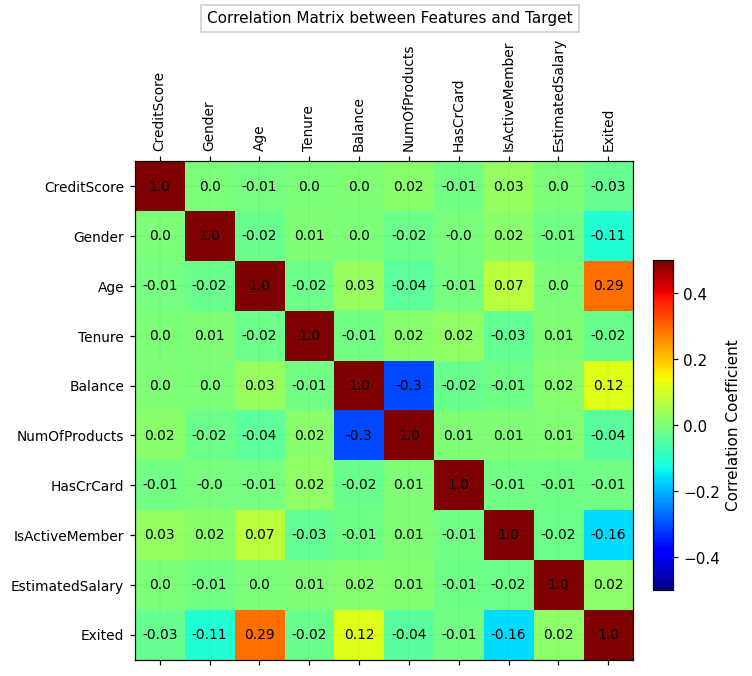

In [10]:
font = {'size'   : 10}
plt.rc('font', **font)
fig, ax=plt.subplots(figsize=(6, 6), dpi= 110, facecolor='w', edgecolor='k')

df_tmp=train_set_strat.drop(['Geography_France','Geography_Germany','Geography_Spain'], axis=1)
colmn=list(df_tmp.columns)
corr=np.zeros((len(colmn),len(colmn)))

for l in range(len(colmn)):
    for l1 in range(len(colmn)):
        cc=np.corrcoef(df_tmp[colmn[l]],df_tmp[colmn[l1]])
        corr[l,l1]=cc[0,1]
        ax.text(l, l1, str(round(cc[0,1],2)), va='center', ha='center',fontsize=9)

im =ax.matshow(corr, cmap='jet', interpolation='nearest',vmin=-0.5, vmax=0.5)

cbaxes = fig.add_axes([0.92, 0.23, 0.03, 0.50]) 
cbar =fig.colorbar(im,cax=cbaxes,shrink=0.5,label='Correlation Coefficient')
cbar.ax.tick_params(labelsize=10) 

ax.set_xticks(np.arange(len(corr)))
ax.set_xticklabels(colmn,fontsize=9, rotation=90)
ax.set_yticks(np.arange(len(corr)))
ax.set_yticklabels(colmn,fontsize=9)
ax.grid(color='k', linestyle='-', linewidth=0.025)
plt.text(-23,1.22,'Correlation Matrix between Features and Target', 
         fontsize=10,bbox=dict(facecolor='white', alpha=0.2))

plt.show()

Figure below show correlation between training features and target feature (Exited). Age has positive correlation and IsActiveMember has negative correlation with target (`Exited`). Other Features are not linearly correlated with the target (`Exited`).

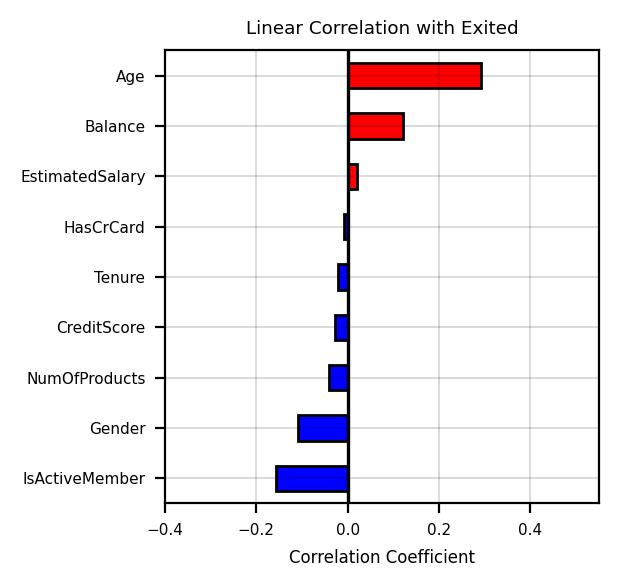

In [11]:
font = {'size'   : 5.5}
plt.rc('font', **font)
ax1 = plt.subplots(figsize=(2.8, 3), dpi= 200, facecolor='w', edgecolor='k')

# Plot correlations of attributes with the last column
corr_bar(df_tmp,title='Linear Correlation with Exited')

## Standardization 

In [12]:
# Make training features and target
X_train = train_set_strat.drop("Exited", axis=1)
y_train = train_set_strat["Exited"].values

In [13]:
# Divide into two training sets (with and without standization)
clmn=['Geography_France','Geography_Germany','Geography_Spain',
                               'Gender','NumOfProducts','HasCrCard','IsActiveMember']
X_train_for_std = X_train.drop(clmn, axis=1)

X_train_not_std =X_train[clmn]

features_colums=list(X_train_for_std.columns)+list(X_train_not_std.columns)

In [14]:
# Standadization
scaler = StandardScaler()
scaler.fit(X_train_for_std)

# Standardization for training set
df_train_std=scaler.transform(X_train_for_std)

fname = './Trained Models/scaler.sav'
pickle.dump(scaler, open(fname, 'wb'))

In [15]:
X_train_std=np.concatenate((df_train_std,X_train_not_std), axis=1)
X_train_std

array([[-0.37708143,  1.05758327, -0.35609222, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.50297627,  0.10215877,  0.68069212, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.16130681,  0.67541347, -0.01049744, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [-0.30460609,  0.77095592,  0.68069212, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.03706337, -1.42652045,  1.0262869 , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.22772967, -1.13989309,  0.68069212, ...,  1.        ,
         1.        ,  0.        ]])

In [16]:
# Divide training data into smaller training and validation 

# Training set
Training_c=np.concatenate((X_train_std,y_train.reshape(-1,1)),axis=1)
Smaller_Training, Validation = train_test_split(Training_c, test_size=0.2, random_state=100)
Smaller_Training_Target=Smaller_Training[:,-1]
Smaller_Training=Smaller_Training[:,:-1]

# Validation set
Validation_Target=Validation[:,-1]
Validation=Validation[:,:-1]

In [17]:
# Number of predictors and make empty arrays
predictor= ['Dummy Classifier','Stocastic Gradient Descent','Logistic Regression',
            'Support Vector Machine','Decision Trees','Adaptive Gradient Boosting',
            'Random Forest','Neural Network']
filename=["" for x in range(len(predictor))]

# Creat Empty List for Avergae Accuracy for each regressor
Predict_training=np.zeros(len(predictor))
pre_prob=[]

Train_Accu=np.zeros(len(predictor)); Train_Rec=np.zeros(len(predictor));Train_Pre=np.zeros(len(predictor));Train_Spe=np.zeros(len(predictor))
Test_Accu=np.zeros(len(predictor)); Test_Rec=np.zeros(len(predictor));Test_Pre=np.zeros(len(predictor));Test_Spe=np.zeros(len(predictor))

 # Predictive Models

A wide range of machine learning algorithms from basic to advanced methods. A brief explanation of each is as follows:

- **Stochastic Gradient Descent (SGD)** is a good place to start. Gradient descent is a general idea to minimize a cost function by iteratively tweaking parameters. It has a wide range of application to find optimal solutions for many problems. It computes the gradient of the cost function regarding model parameters and updates the parameters through iteration until a global minimum of cost function is reached. Gradient Descent (and mini-batch) can be very slow for large data set: Stochastic Gradient Descent is efficient because it just picks a random instance at every iteration and computes the gradients based only on that single instance.


- **Logistic Regression (LR)** is a simple approach to estimate the probability of a particular class. It calculates a weighted sum of the input features (plus a bias term) and use sigmoid function to estimate probability of each class. It has been commonly used for medical science and health and failure detection in engineering.


- **Support Vector Machine (SVM)** is a powerful algorithm to perform linear or nonlinear classification.It is highly preferred since less computation power is required to produce reliable accuracy.The fundamental idea is to have the largest possible margin between the classes. It predicts theclass of a new instance by computing a decision function with optimum parameters.


- **Decision Trees (DT)** is a reliable ML algorithms and has been widely applied to solve complex and non-linear problems for both classification and regression. It is the fundamental component of Random Forest: it is applied based on a flowchart structure in which each node denotes a test, each branch represents the result of the test, and each leaf node represents a class label.


- **Random Forest (RF)** is among the most versatile and reliable machine learning algorithms for non-linear and complex data. The RF randomly creates and merges multiple decision trees and predicts a class that gets the most votes among all trees. Despite its simplicity, RF is one of the most powerful ML algorithms available today.


- **Adaptive Boosting (AB)** can be applied for any predictor mentioned above to enhance the performance and turn into a stronger learner. The general idea is to use a base classifier and apply on training set first, then corrects base classifier by paying attention to the training instances that are underfitted. This leads to a new classifier focusing more on the hard cases. The process of training a classifier repeated sequentially, each classifier trying to correct its predecessor. 


- **Neural Network** is a specific subfield of machine learning for tackling a very complex problem. In comparison with Shallow Neural Network, Deep Neural Network usually involves much more successive layers of representations that are learned from training data. The large network’s architecture may lead to some problems such as vanishing/exploding gradients, overfitting, computational cost and slow training. However, these problems can be resolved by tuning some hyperparameters. Deep Neural Network has been recently applied in many disciplines including computer vision, speech recognition, natural language processing, audio recognition and so on.


- **Ensemble Learning** usually applies near the end of project when a few good and promising predictors are built to integrate them into an even stronger predictor. It works by aggregating the predictions of a group of predictors. RF and AB can be categorized as EL. A very simple EL is hard voting (HV) that aggregates the predictions of each classifier and predicts the class that gets the most votes. Soft voting (SV) is another EL that works by averaging the probability of
each class and predict a class with the highest probability. It often achieves higher performance than HV due to giving more weight to highly confident votes. Instead of using simple functions to aggregate the predictions of all predictors, staking approach (SA) trains a model to perform this aggregation. The final predictor takes these predictions as inputs and makes the final prediction. EL may lead to even better prediction than the best individual if predictors are independent
from each other (Géron 2019).

The performance of all seven algorithms are measured for both training set and test set compared with a Dummy Classifier for sanity check. This classifier is useful as a simple baseline to compare with other (real) classifiers. The ML algorithms for this work are retrieved from Scikit-Learn and Tensorflow Libraries.

## Performance Measurement

The most common approach for assessment of classification is accuracy, which is calculated by number of true predicted over total number of data. However, accuracy alone may not be practical for performance measurement of classifiers, especially in cease of skewed datasets. Accuracy should be considered along with other metrics. Confusion matrix is a much better way to evaluate the performance of a classifier. The general idea is to consider the number of times instances of negative class are misclassified as positive class and vice versa. Three more metrics Sensitivity, Precision and Specificity can be calculated as well as Accuracy:

**Accuracy=(𝑇𝑃+𝑇𝑁)/(𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁):** Accuracy is simply the fraction of the total samples that is correctly identified.

**Sensitivity (Recall)= 𝑇𝑃/(𝑇𝑃+𝐹𝑁):** Sensitivity is the proportion of correct positive predictions to the total positive classes.

**Precision= 𝑇𝑃/(𝑇𝑃+𝐹𝑃):** Precision is the proportion of correct positive prediction to the total predicted values. 

**Specificity= 𝑇𝑁/(𝑇𝑁+𝐹𝑃)** Specificity is the true negative rate or the proportion of negatives that are correctly identified. 

**TP:** True Positives, **FP:** False Positives, **FN:** False Negatives, **TN:** True Negatives

<p>&nbsp;</p>

Another common approach to measure performance is the receiver operating characteristic (ROC). The ROC curve plots the true positive rate (Sensitivity) against the false positive rate (1-Specificity). Every point on the ROC curve represents a chosen cut-off even though it cannot be seen. For more information and details see ROC. The most common way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5 (See Figure below). 


<p>&nbsp;</p>
<img src="https://raw.githubusercontent.com/MehdiRezvandehy/Machine-Learning-Course-University-of-Calgary/master/Images/fig3_churn.png " alt="drawing" width="650"/>

## Dummy Classifier

In [18]:
dmy_clf = DummyClassifier(random_state=42)
dmy_clf.fit(X_train_std,y_train)
y_train_pred=cross_val_predict(dmy_clf,X_train_std,y_train, cv=3)
y_train_proba_dc=cross_val_predict(dmy_clf,X_train_std,y_train, cv=3, method='predict_proba')

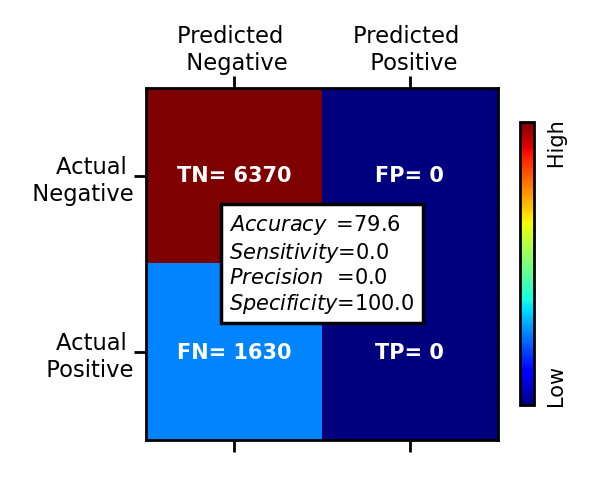

In [19]:
i=0
tmp1,tmp2,tmp3,tmp4=Conf_Matrix(y_train,y_train_pred,axt=ax1)
Train_Accu[i]=tmp1; Train_Pre[i]=tmp2; Train_Rec[i]=tmp3; Train_Spe[i]=tmp4

# save the model to disk
filename[i] = './Trained Models/dmy_clf.sav'
pickle.dump(dmy_clf, open(filename[i], 'wb'))

## Stochastic Gradient Descent

In [20]:
sgd_clf = SGDClassifier(random_state=42,loss='log')
sgd_clf.fit(X_train_std,y_train)
y_train_pred=cross_val_predict(sgd_clf,X_train_std,y_train, cv=3)
y_train_proba_sgd=cross_val_predict(sgd_clf,X_train_std,y_train, cv=3, method='predict_proba')

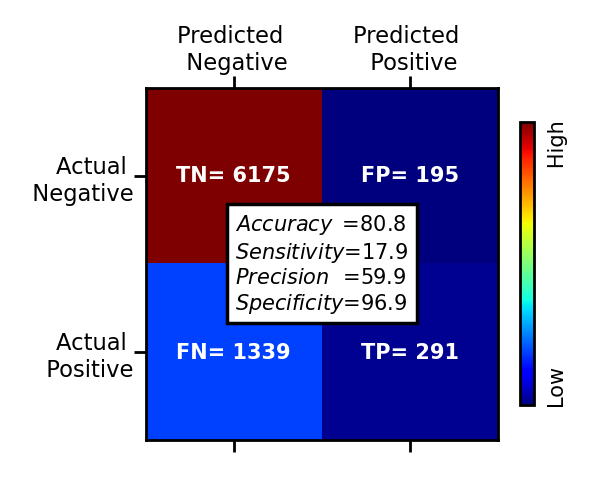

In [21]:
i=1
tmp1,tmp2,tmp3,tmp4=Conf_Matrix(y_train,y_train_pred,axt=ax1)
Train_Accu[i]=tmp1; Train_Pre[i]=tmp2; Train_Rec[i]=tmp3; Train_Spe[i]=tmp4

# save the model to disk
filename[i] = './Trained Models/sgd_clf.sav'
pickle.dump(sgd_clf, open(filename[i], 'wb'))

## Logistic Regression

In [22]:
lr_clf = LogisticRegression(max_iter= 50,C=50,random_state=42) 
lr_clf.fit(X_train_std,y_train)
y_train_pred=cross_val_predict(lr_clf,X_train_std,y_train, cv=3)
y_train_proba_lr=cross_val_predict(lr_clf,X_train_std,y_train, cv=3, method='predict_proba')

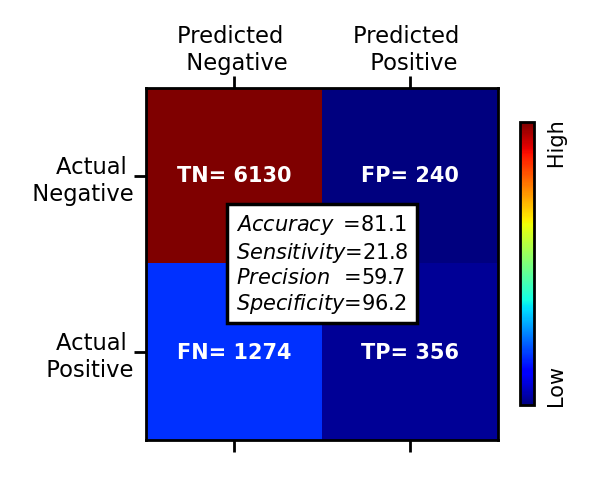

In [23]:
i=2
tmp1,tmp2,tmp3,tmp4=Conf_Matrix(y_train,y_train_pred,axt=ax1)
Train_Accu[i]=tmp1; Train_Pre[i]=tmp2; Train_Rec[i]=tmp3; Train_Spe[i]=tmp4

# save the model to disk
filename[i] = './Trained Models/lr_clf.sav'
pickle.dump(lr_clf, open(filename[i], 'wb'))

## Support Vector Machine

In [24]:
svm_clf = LinearSVC(C=60,loss='hinge',random_state=42) 
svm_clf.fit(X_train_std,y_train)
y_train_pred=cross_val_predict(svm_clf,X_train_std,y_train, cv=3)
y_train_proba_svm=y_train_pred

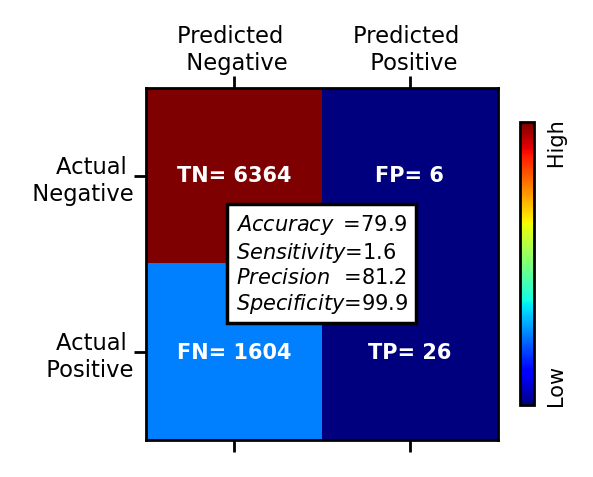

In [25]:
i=3
tmp1,tmp2,tmp3,tmp4=Conf_Matrix(y_train,y_train_pred,axt=ax1)
Train_Accu[i]=tmp1; Train_Pre[i]=tmp2; Train_Rec[i]=tmp3; Train_Spe[i]=tmp4

# save the model to disk
filename[i] = './Trained Models/svm_clf.sav'
pickle.dump(svm_clf, open(filename[i], 'wb'))

## Decision Trees

In [26]:
tree_clf = DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 15, min_samples_split=2, random_state=42)
tree_clf.fit(X_train_std,y_train)
y_train_pred=cross_val_predict(tree_clf,X_train_std,y_train, cv=3)
y_train_proba_dt=cross_val_predict(tree_clf,X_train_std,y_train, cv=3, method='predict_proba')

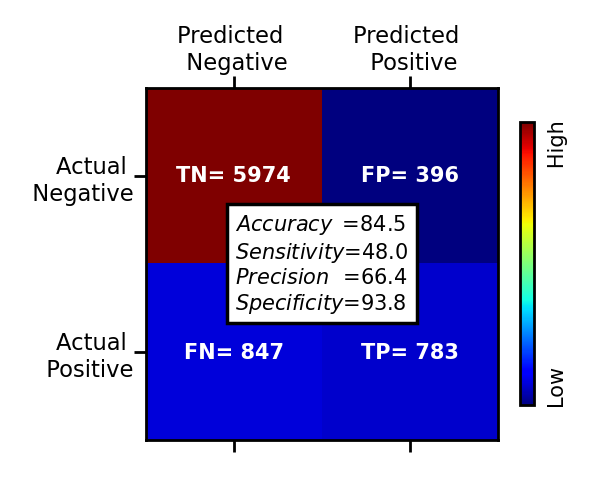

In [27]:
i=4
tmp1,tmp2,tmp3,tmp4=Conf_Matrix(y_train,y_train_pred,axt=ax1)
Train_Accu[i]=tmp1; Train_Pre[i]=tmp2; Train_Rec[i]=tmp3; Train_Spe[i]=tmp4

# save the model to disk
filename[i] = './Trained Models/tree_clf.sav'
pickle.dump(tree_clf, open(filename[i], 'wb'))

### Flowchart of Decision Tree for Prediction 

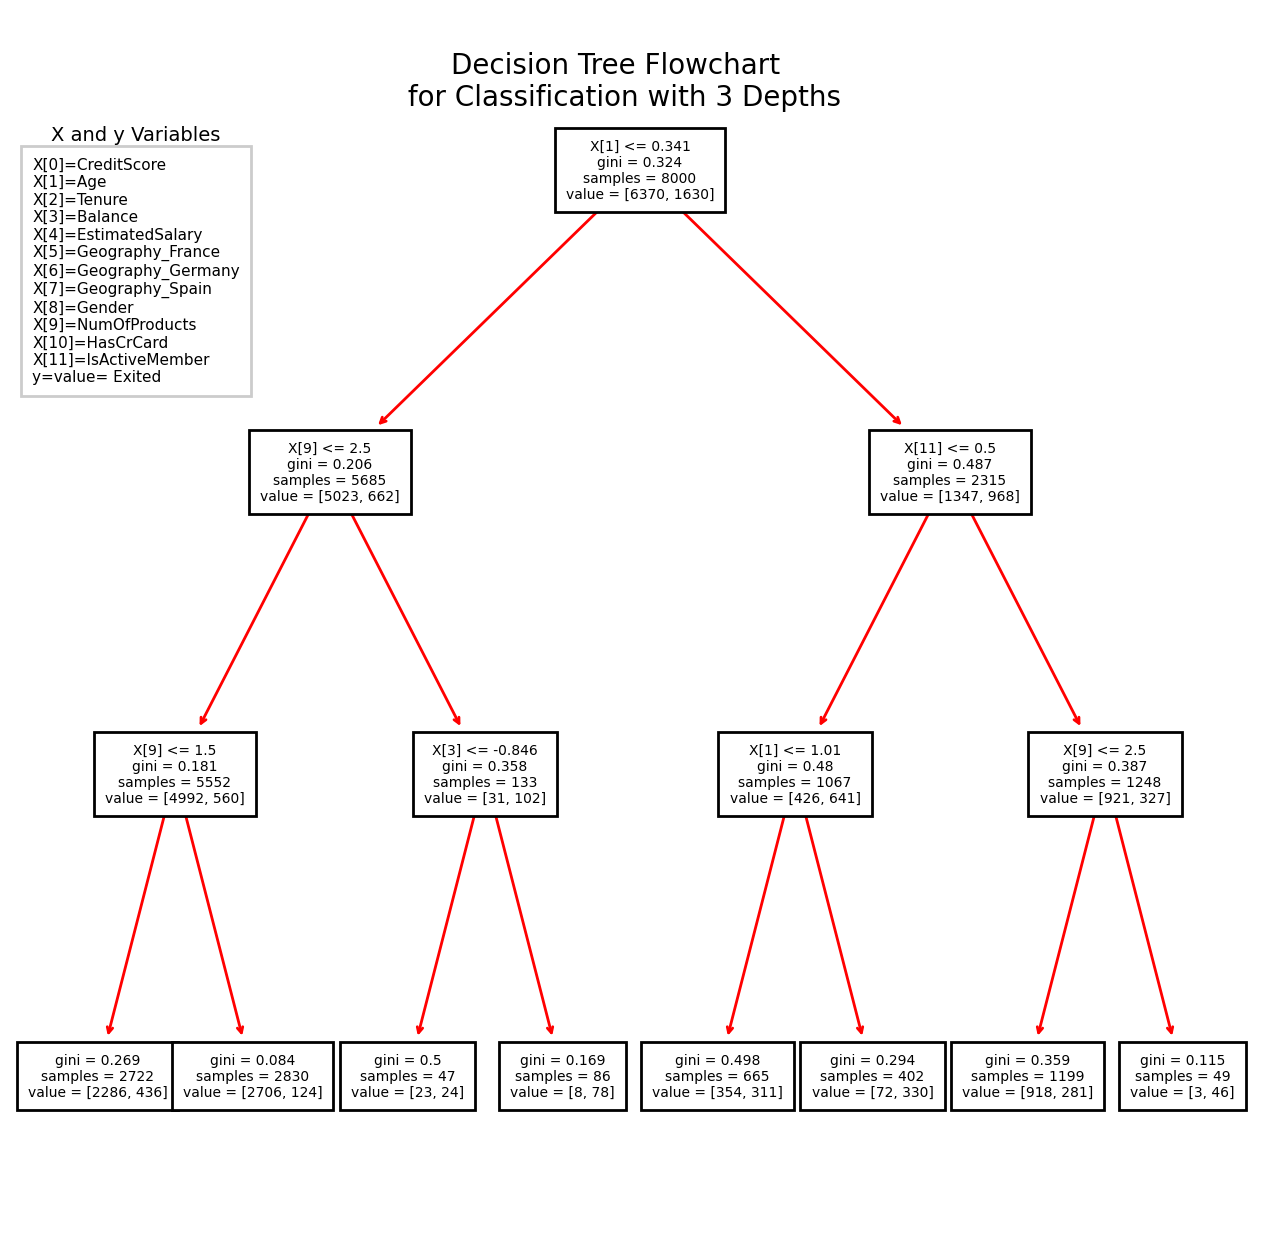

In [28]:
# Flowchart of Decision Tree for Prediction with 3 depths. Training features (X) and target (y) are shown in the figure.
np.random.seed(42) 
tree_clf = tree.DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train_std,y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=200)
out = tree.plot_tree(tree_clf,fontsize=5)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(1)       

txt=''
for i in range(len(features_colums)):
    txt+='X'+'['+str(i)+']='+features_colums[i]+'\n'
txt+='y=value= Exited'
plt.text(0.025,0.9, 'X and y Variables', fontsize=7,bbox=dict(facecolor='white', alpha=0.0))
plt.text(0.01,0.7, txt, fontsize=5.5,bbox=dict(facecolor='white', alpha=0.2))
fig.suptitle('Decision Tree Flowchart \n for Classification with 3 Depths', fontsize=10,y=0.86)
plt.show()

## Adaptive Boosting with Decision Trees

In [29]:
ada_tree = AdaBoostClassifier(n_estimators=100, algorithm= 'SAMME.R', learning_rate= 0.01, random_state=42)  
ada_tree.fit(X_train_std,y_train)
y_train_pred=cross_val_predict(ada_tree,X_train_std,y_train, cv=3)
y_train_proba_ada=cross_val_predict(ada_tree,X_train_std,y_train, cv=3, method='predict_proba')

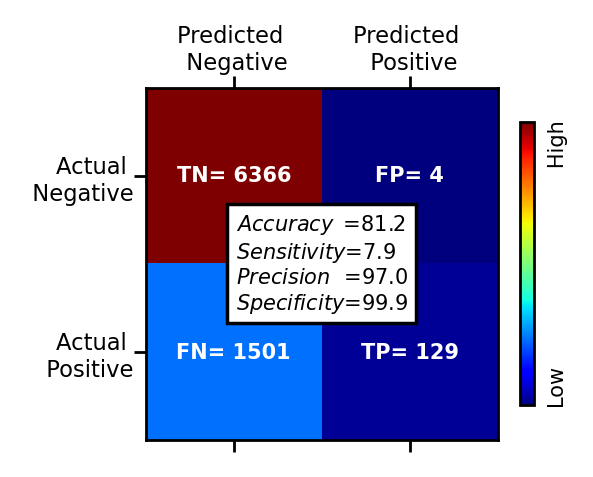

In [30]:
i=5
tmp1,tmp2,tmp3,tmp4=Conf_Matrix(y_train,y_train_pred,axt=ax1)
Train_Accu[i]=tmp1; Train_Pre[i]=tmp2; Train_Rec[i]=tmp3; Train_Spe[i]=tmp4

# save the model to disk
filename[i] = './Trained Models/ada_tree.sav'
pickle.dump(ada_tree, open(filename[i], 'wb'))

## Random Forest

In [31]:
rnd = RandomForestClassifier(n_estimators=50, max_depth= 25, min_samples_split= 20, bootstrap= True, random_state=42)
rnd.fit(X_train_std,y_train)
y_train_pred=cross_val_predict(rnd,X_train_std,y_train, cv=3)
y_train_proba_rnd=cross_val_predict(rnd,X_train_std,y_train, cv=3, method='predict_proba')

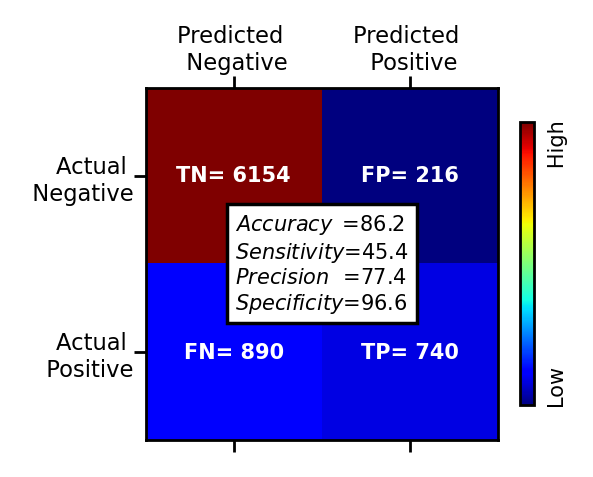

In [32]:
i=6 
tmp1,tmp2,tmp3,tmp4=Conf_Matrix(y_train,y_train_pred,axt=ax1)
Train_Accu[i]=tmp1; Train_Pre[i]=tmp2; Train_Rec[i]=tmp3; Train_Spe[i]=tmp4

# save the model to disk
filename[i] = './Trained Models/rnd.sav'
pickle.dump(rnd, open(filename[i], 'wb'))

### Random Forest Feature Importance

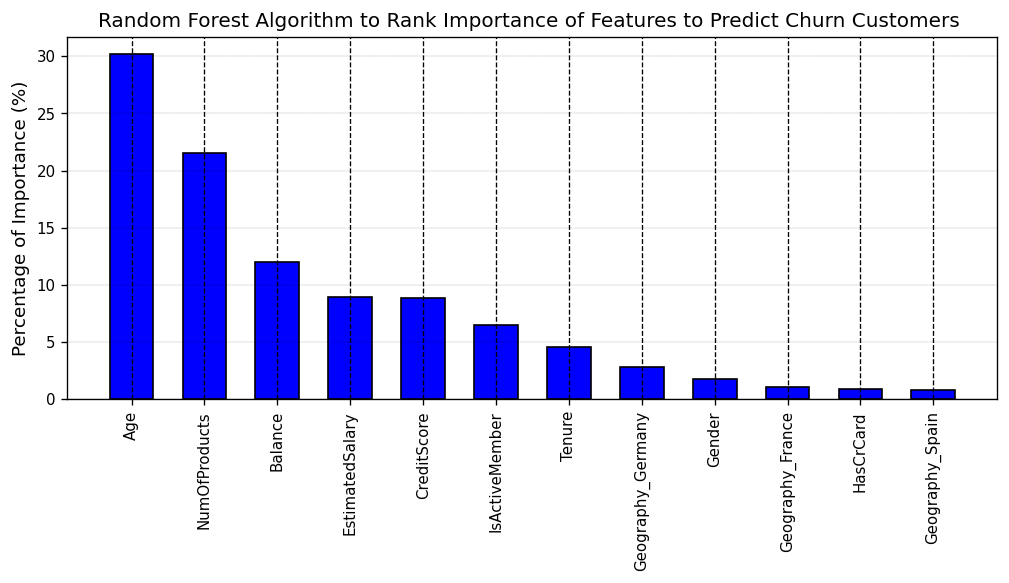

In [33]:
font = {'size'   : 9}
plt.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(10, 4), dpi= 120, facecolor='w', edgecolor='k')

score=list((rnd.feature_importances_*100))
sort_low_high=np.sort(score, axis=0)
sort_high_low=sort_low_high[::-1]
clmns=list(features_colums)
sort_colms=[]
for i in range(len(sort_high_low)):
    ind=score.index(sort_high_low[i])
    sort_colms.append(clmns[ind])
index = np.arange(len(sort_high_low))
ax1.bar(index, sort_high_low, align='center',width=0.6, alpha=1, ecolor='black',edgecolor ='k', capsize=4,color='b')
ax1.set_ylabel('Percentage of Importance (%)',fontsize=11)
ax1.set_xticks(np.arange(len(sort_colms)))
ax1.set_xticklabels(sort_colms, rotation=90)     
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.8) 
ax1.yaxis.grid(color='k', linestyle='--', linewidth=0.1) 
plt.title('Random Forest Algorithm to Rank Importance of Features to Predict Churn Customers ',fontsize=12)
plt.show() 

## Neural Network

In [34]:
model_NN=ANN (input_dim=Smaller_Training.shape[1], activation= 'relu',
              dropout_rate= False, neurons= 100 )  

# Early stopping to avoid overfitting
monitor= keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-5,patience=5, mode='auto')
history=model_NN.fit(Smaller_Training,Smaller_Training_Target,batch_size=32,validation_data=
          (Validation,Validation_Target),callbacks=[monitor],verbose=1,epochs=1000)

Epoch 1/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.8102 - val_loss: 0.4149 - val_accuracy: 0.8244
Epoch 2/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.8317 - val_loss: 0.3992 - val_accuracy: 0.8325
Epoch 3/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.3812 - accuracy: 0.8436 - val_loss: 0.3820 - val_accuracy: 0.8438
Epoch 4/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.3642 - accuracy: 0.8497 - val_loss: 0.3671 - val_accuracy: 0.8587
Epoch 5/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.3449 - accuracy: 0.8578 - val_loss: 0.3498 - val_accuracy: 0.8612
Epoch 6/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.3318 - accuracy: 0.8677 - val_loss: 0.3551 - val_accuracy: 0.8631
Epoch 7/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.3202 - accuracy: 0.8745 - val_loss: 0.3574 - val_accuracy:

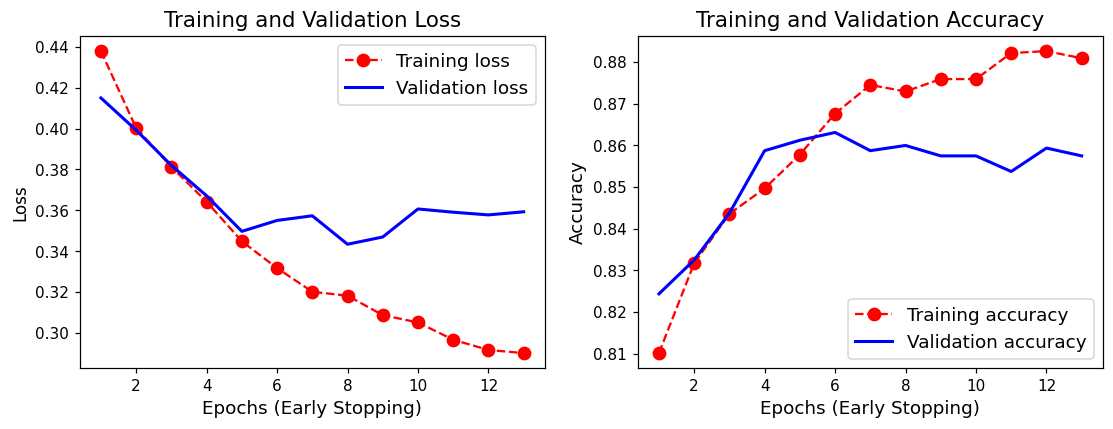

In [35]:
plot(history)

### Bootstraping (Neural Network)

Bootstrapping is run to achieve reliable number of epochs for neural network.

In [36]:
tf.get_logger().setLevel(logging.ERROR)  # Disable tensorflow warning
pred_out_of_smpl= []
y_out_of_smpl   = []
acr_out_of_smpl   = []

# Apply 20 bootstraping sampling
n_splits=20
boot = StratifiedShuffleSplit(n_splits=n_splits,test_size=0.2, random_state=42)

num = 0
ES_epoches=[]
for train_idx, validation_idx in boot.split(X_train_std, y_train):
    num+=1
    x_train      = X_train_std[train_idx]
    t_train      = y_train[train_idx]
    x_validation = X_train_std[validation_idx]
    t_validation = y_train[validation_idx]  
    
    y_out_of_smpl.append(t_validation) 
    
    # Call Function
    model, epoch=BS_ANN(x_train=x_train,y_train=t_train,
                 x_Validation=x_validation,y_Validation=t_validation,neurons=100, activation= 'relu',
              dropout_rate= False)
    
    ES_epoches.append(epoch)
    pred = model.predict(x_validation)
    
    pred=[1 if i >= 0.5 else 0 for i in pred]
    pred_out_of_smpl.append(pred)    
    
    acr=accuracy_score(t_validation, pred) 
    reca=recall_score(t_validation, pred) # == TP/(TP+FN) ) 
    
    acr_out_of_smpl.append(reca)
    
    # Record this
    print('Sample #'+str(num)+', Mean Recall='+str(np.round(np.mean(acr_out_of_smpl),4))
          +', S.D. Recall='+str(np.round(np.sqrt(np.var(acr_out_of_smpl)),4))
          +', Epoch='+str(epoch)+', Mean Epoch='+str(int(np.mean(ES_epoches))))    

Sample #1, Mean Recall=0.4509, S.D. Recall=0.0, Epoch=10, Mean Epoch=10
Sample #2, Mean Recall=0.4601, S.D. Recall=0.0092, Epoch=10, Mean Epoch=10
Sample #3, Mean Recall=0.4652, S.D. Recall=0.0104, Epoch=11, Mean Epoch=10
Sample #4, Mean Recall=0.4632, S.D. Recall=0.0097, Epoch=10, Mean Epoch=10
Sample #5, Mean Recall=0.4755, S.D. Recall=0.026, Epoch=15, Mean Epoch=11
Sample #6, Mean Recall=0.4749, S.D. Recall=0.0238, Epoch=9, Mean Epoch=10
Sample #7, Mean Recall=0.4746, S.D. Recall=0.022, Epoch=11, Mean Epoch=10
Sample #8, Mean Recall=0.482, S.D. Recall=0.0284, Epoch=12, Mean Epoch=11
Sample #9, Mean Recall=0.4857, S.D. Recall=0.0288, Epoch=13, Mean Epoch=11
Sample #10, Mean Recall=0.4856, S.D. Recall=0.0273, Epoch=11, Mean Epoch=11
Sample #11, Mean Recall=0.4877, S.D. Recall=0.0269, Epoch=11, Mean Epoch=11
Sample #12, Mean Recall=0.4923, S.D. Recall=0.0299, Epoch=13, Mean Epoch=11
Sample #13, Mean Recall=0.4932, S.D. Recall=0.0289, Epoch=11, Mean Epoch=11
Sample #14, Mean Recall=0.48

In [37]:
# Call Function with fined-tune numebr of neurons
model_FNN=ANN (input_dim=X_train_std.shape[1], activation= 'relu',
              dropout_rate= False, neurons= 100 )  

# Early stopping to avoid overfitting
history=model_FNN.fit(X_train_std, y_train,batch_size=32,verbose=1,epochs=11)

Epoch 1/11
250/250 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.8074
Epoch 2/11
250/250 [==============================] - 0s 1ms/step - loss: 0.3951 - accuracy: 0.8360
Epoch 3/11
250/250 [==============================] - 0s 1ms/step - loss: 0.3680 - accuracy: 0.8509
Epoch 4/11
250/250 [==============================] - 0s 1ms/step - loss: 0.3452 - accuracy: 0.8602
Epoch 5/11
250/250 [==============================] - 0s 1ms/step - loss: 0.3346 - accuracy: 0.8643
Epoch 6/11
250/250 [==============================] - 0s 1ms/step - loss: 0.3252 - accuracy: 0.8702
Epoch 7/11
250/250 [==============================] - 0s 1ms/step - loss: 0.3191 - accuracy: 0.8705
Epoch 8/11
250/250 [==============================] - 0s 1ms/step - loss: 0.3149 - accuracy: 0.8735
Epoch 9/11
250/250 [==============================] - 0s 1ms/step - loss: 0.3105 - accuracy: 0.8742
Epoch 10/11
250/250 [==============================] - 0s 1ms/step - loss: 0.3047 - accuracy: 0.8775

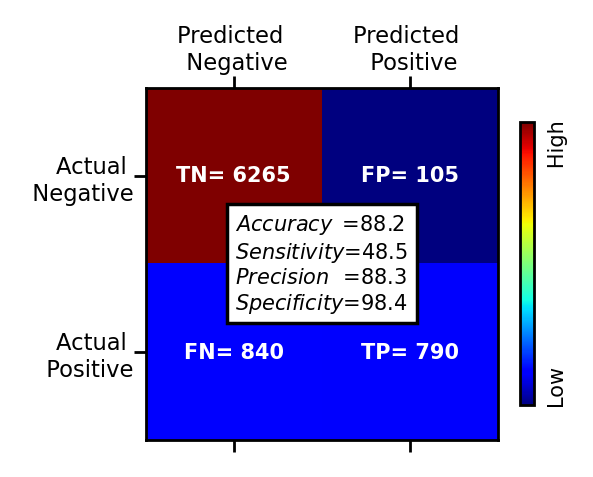

In [38]:
i=7
pred = model_FNN.predict(X_train_std)
y_train_proba_ai=pred
y_train_pred=[1 if i >= 0.5 else 0 for i in pred]
tmp1,tmp2,tmp3,tmp4=Conf_Matrix(y_train,y_train_pred,axt=ax1)

Train_Accu[i]=tmp1; Train_Pre[i]=tmp2; Train_Rec[i]=tmp3; Train_Spe[i]=tmp4

# save the model to disk
filename[i] = './Trained Models/'
model_FNN.save(os.path.join(filename[i],"NN_model.h5"))

# ROC Chart  for Training set

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity. **Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.**

For more information and details about ROC, see [ROC](https://acutecaretesting.org/en/articles/roc-curves-what-are-they-and-how-are-they-used#:~:text=The%20ROC%20curve%20is%20a,TP%2F(TP%2BFN))

**Thus every point on the ROC curve represents a chosen cut-off even though you cannot see this cut-off. What you can see is the true positive fraction and the false positive fraction that you will get when you choose this cut-off.**

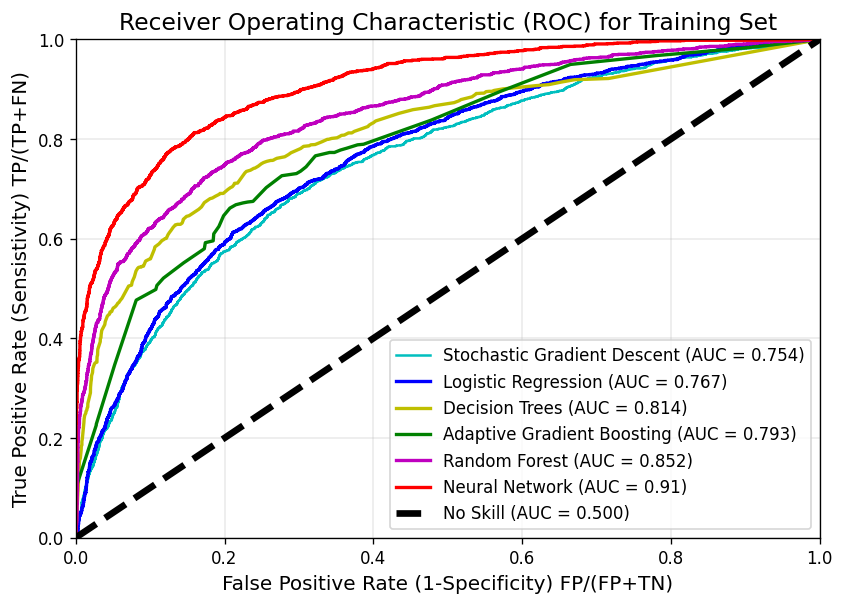

In [39]:
font = {'size' : 10}
plt.rc('font', **font)
fig = plt.subplots(figsize=(8,5.5), dpi= 120, facecolor='w', edgecolor='k')

# Stochastic Gradient Descent
i=1
y=y_train
pred=y_train_proba_sgd[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
#plt.scatter(fpr, tpr,s=10,c=thresold,linewidths=0,cmap='gray',vmin=0, vmax=1)
plt.plot(fpr, tpr,'c', linewidth=1.5,label='Stochastic Gradient Descent (AUC = %0.3f)' % roc_auc)

# Logistic Regression
y=y_train
pred=y_train_proba_lr[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
#plt.scatter(fpr, tpr,s=10,c=thresold,linewidths=0,cmap='gray',vmin=0, vmax=1)
plt.plot(fpr, tpr,'b', linewidth=2,label='Logistic Regression (AUC = %0.3f)' % roc_auc)

# Decision Trees
y=y_train
pred=y_train_proba_dt[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
#plt.scatter(fpr, tpr,s=40,c=thresold,linewidths=0,cmap='gray',vmin=0, vmax=1)
plt.plot(fpr, tpr,'y', linewidth=2,label='Decision Trees (AUC = %0.3f)' % roc_auc)

# Adaptive Gradient Boosting
y=y_train
pred=y_train_proba_ada[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
#plt.scatter(fpr, tpr,s=40,c=thresold,linewidths=0,cmap='gray',vmin=0, vmax=1)
plt.plot(fpr, tpr,'g', linewidth=2,label='Adaptive Gradient Boosting (AUC = %0.3f)' % roc_auc)


# Random Forest
y=y_train
pred=y_train_proba_rnd[:,1]
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
#plt.scatter(fpr, tpr,s=10,c=thresold,linewidths=0,cmap='gray',vmin=0, vmax=1)
plt.plot(fpr, tpr,'m', linewidth=2,label='Random Forest (AUC = %0.3f)' % roc_auc)

# Neural Network
y=y_train
pred=y_train_proba_ai
fpr, tpr, thresold = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
#plt.scatter(fpr, tpr,s=10,c=thresold,linewidths=0,cmap='gray',vmin=0, vmax=1)
plt.plot(fpr, tpr,'r', linewidth=2,label='Neural Network (AUC = %0.2f)' % roc_auc)


#plt.colorbar(shrink=0.6,label='Threshould Probability',orientation='horizontal')

# Random Classifier
ns_probs = [1 for _ in range(len(y))]
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
roc_auc = auc(ns_fpr, ns_tpr)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, 'k--', linewidth=4,label='No Skill (AUC = %0.3f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1-Specificity) FP/(FP+TN)',fontsize=12)
plt.ylabel('True Positive Rate (Sensistivity) TP/(TP+FN)',fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) for Training Set',fontsize=14)
plt.grid(linewidth='0.25')
plt.legend(loc="lower right")

plt.show()

The best model is neural network with AUC=0.91 followed by Random Forest (AUC=0.85). Lets compare accuracy, sensitivity, specificity and precision of the classifiers.

# Performance of the Models on Training Set

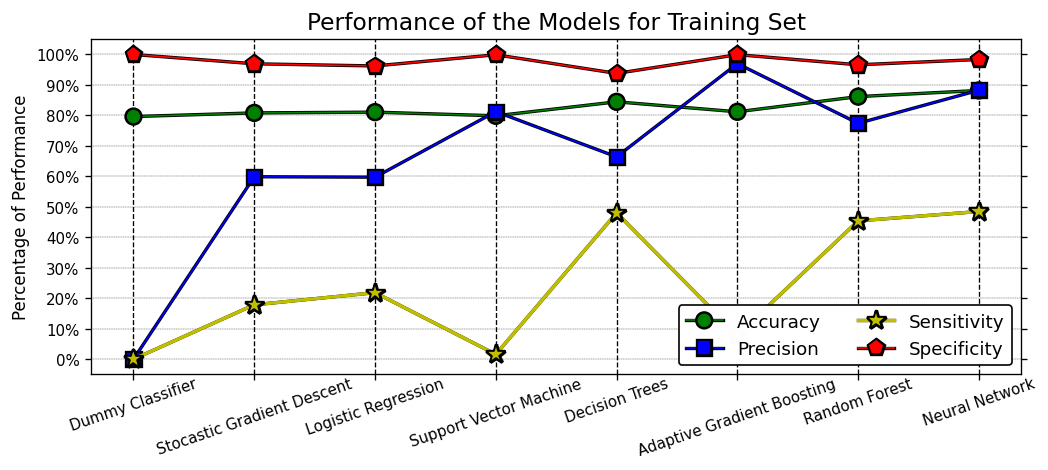

In [40]:
font = {'size'   :9 }
plt.rc('font', **font)

ax2 = ax1.twinx()

fig, ax1 = plt.subplots(figsize=(10, 3.7), dpi= 120, facecolor='w', edgecolor='k')

ax1.plot(predictor,Train_Accu*100,'go-',linewidth=1,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()],
                                                             markersize=9,label='Accuracy',markeredgecolor='k')
ax1.plot(predictor,Train_Pre*100,'bs-',linewidth=1,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()],
                                                             markersize=8.5,label='Precision',markeredgecolor='k') 
ax1.plot(predictor,Train_Rec*100,'y*-',linewidth=2,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()],
                                                             markersize=12,label='Sensitivity',markeredgecolor='k') 
ax1.plot(predictor,Train_Spe*100,'rp-',linewidth=1,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()],
                                                           markersize=10,label='Specificity',markeredgecolor='k')   
ax1.set_xticks(np.arange(len(predictor)))
ax1.set_xticklabels(predictor,y=0.03, rotation=19)       
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.8) 
ax1.yaxis.grid(color='k', linestyle='--', linewidth=0.2) 
plt.ylabel('Percentage of Performance',fontsize=10)
plt.title('Performance of the Models for Training Set',fontsize=14)
legend=plt.legend(ncol=2,loc=4,fontsize='11',framealpha =3) 
legend.get_frame().set_edgecolor("black")

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.yticks([0,10,20,30,40,50,60,70,80,90,100],y=0, fontsize=9)
ax1.yaxis.set_ticks_position('both')

#plt.ylim(0.55,0.75)
plt.show()

Sensitivity is very low for all classifiers that lead to very high false negatives. This is problematic for customer churn since we want to minimize false negatives prediction. We can change the threshold to decrease precision that leads to increase sensitivity. See the Figure below for the plot of precision and sensitivity for each threshold for Neural Network. By decreasing the threshold from 0.5 to 0.29, sensitivity will increase.

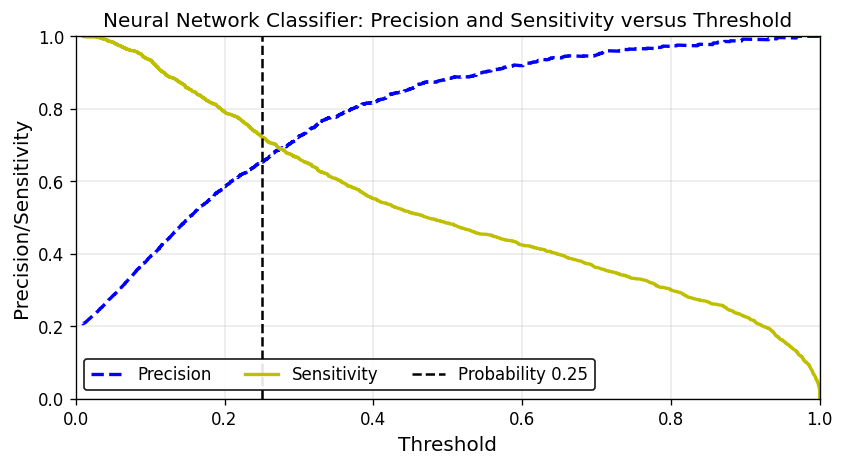

In [41]:
font = {'size' : 10}
plt.rc('font', **font)
fig = plt.subplots(figsize=(8,4), dpi= 120, facecolor='w', edgecolor='k')

pred=y_train_proba_ai
precisions, sensitivity, thresholds = precision_recall_curve(y, pred)
threshold_7 = 0.25
plot_precision_recall_vs_threshold(precisions, sensitivity, thresholds,x=threshold_7)
plt.show()

Now calculate the sensitivity and precision again with threshold 0.25. Sensitivity increases to 0.72 but precision decreases to 0.65. This threshold will apply for test set and future data.

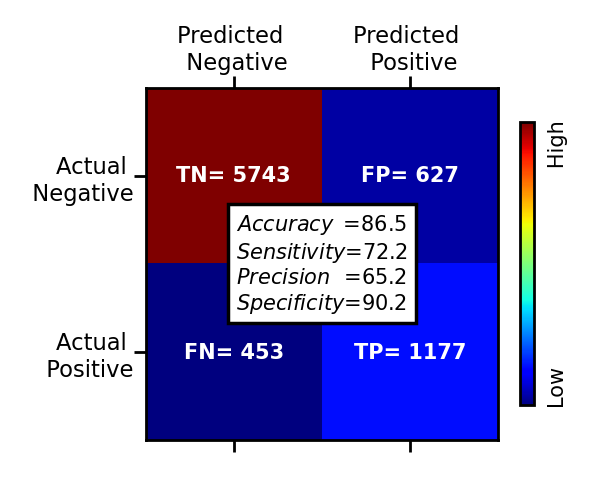

In [42]:
y_p=[1 if i >= threshold_7 else 0 for i in pred]
_,_,_,_=Conf_Matrix(y_train,y_p,axt=ax1)

# Test Set

Process the test data using the same approach and statistics from training set.

In [43]:
# Data Processing 

# Convert Geography to one-hot-encoding
Geog_1hot=pd.get_dummies(test_set_strat['Geography'],prefix='Geography')

# Convert gender to 0 and 1
ordinal_encoder = OrdinalEncoder()
test_set_strat['Gender'] = ordinal_encoder.fit_transform(test_set_strat[['Gender']])

# Remove 'Geography'
test_set_strat=test_set_strat.drop(['Geography'],axis=1,inplace=False)
test_set_strat=pd.concat([Geog_1hot,test_set_strat], axis=1) # Concatenate rows

# Standardize data
X_test = test_set_strat.drop("Exited", axis=1)
y_test = test_set_strat["Exited"].values
#
clmn=['Geography_France','Geography_Germany','Geography_Spain',
                               'Gender','NumOfProducts','HasCrCard','IsActiveMember']
X_test_for_std =  X_test.drop(clmn, axis=1)
X_test_not_std =  X_test[clmn]
features_colums=list(X_test_for_std.columns)+list(X_test_not_std.columns)
#
fname = './Trained Models/scaler.sav'
scaler_model = pickle.load(open(fname, 'rb'))
#
df_test_std=scaler_model.transform(X_test_for_std)
X_test_std=np.concatenate((df_test_std,X_test_not_std), axis=1)

## Prediction on Never Seen before Data

Load the trained Neural Network model and apply for prediction of test set.

Now apply threshold that we applied for training set. The Figure below shows the calculated metrics for test sets.

In [44]:
filename = './Trained Models'
loaded_model = keras.models.load_model(os.path.join(filename,"NN_model.h5"))
pred=loaded_model.predict(X_test_std)

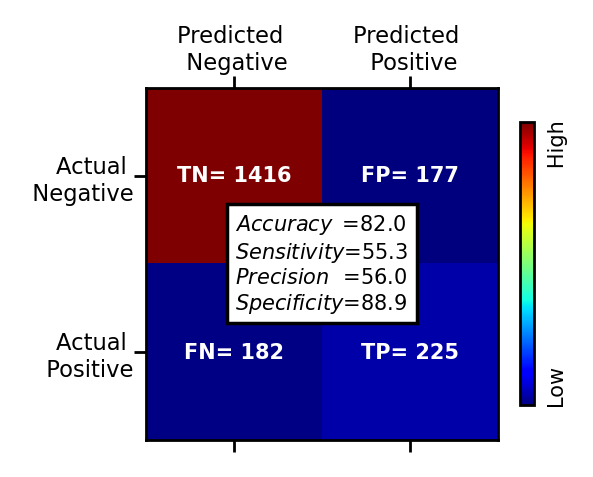

In [45]:
y_p=[1 if i >= threshold_7 else 0 for i in pred]
_,_,_,_=Conf_Matrix(y_test,y_p,axt=ax1)

The sensitivity and precision have been reduced for test set because of the model has not seen the data during training. The performance can be enhanced by increasing more training data 

# Train Final Model with all Data

The final step is training the best model (Neural Network) with entire data to take advantage of all data data to train a better model. The same hyper parameters should be applied.

In [46]:
# Data Processing 

# Read data 'Churn_Modelling.csv'
df = pd.read_csv('Churn_Modelling.csv')

# Remove 'RowNumber','CustomerId','Surname' features that are un
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=False)

# Shuffle the data
np.random.seed(32) 
df=df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True) # Reset index

# Convert Geography to one-hot-encoding
Geog_1hot=pd.get_dummies(df['Geography'],prefix='Geography')

# Convert gender to 0 and 1
ordinal_encoder = OrdinalEncoder()
df['Gender'] = ordinal_encoder.fit_transform(df[['Gender']])

# Remove 'Geography'
df_set_strat=df.drop(['Geography'],axis=1,inplace=False)
df_set_strat=pd.concat([Geog_1hot,df_set_strat], axis=1) # Concatenate rows

# Standardize data
X_df = df_set_strat.drop("Exited", axis=1)
y_df = df_set_strat["Exited"].values
#
clmn=['Geography_France','Geography_Germany','Geography_Spain',
                               'Gender','NumOfProducts','HasCrCard','IsActiveMember']
X_for_std =  X_df.drop(clmn, axis=1)
X_not_std =  X_df[clmn]
features_colums=list(X_for_std.columns)+list(clmn)
#
scaler = StandardScaler()
scaler.fit(X_for_std)

df_std=scaler.transform(X_for_std)
X_test_std=np.concatenate((X_for_std,X_not_std), axis=1)

In [47]:
# Retain Neural Network with entire data
Final_Model=ANN (input_dim=X_for_std.shape[1], activation= 'relu',
              dropout_rate= False, neurons= 100 )  
history=Final_Model.fit(X_for_std, y_df,batch_size=32,verbose=1,epochs=11)

Epoch 1/11
313/313 [==============================] - 0s 1ms/step - loss: 78.1118 - accuracy: 0.6746
Epoch 2/11
313/313 [==============================] - 0s 1ms/step - loss: 11.3040 - accuracy: 0.6797
Epoch 3/11
313/313 [==============================] - 0s 1ms/step - loss: 5.0633 - accuracy: 0.6774
Epoch 4/11
313/313 [==============================] - 0s 1ms/step - loss: 2.6064 - accuracy: 0.6843
Epoch 5/11
313/313 [==============================] - 0s 1ms/step - loss: 1.2519 - accuracy: 0.7058
Epoch 6/11
313/313 [==============================] - 0s 1ms/step - loss: 2.6269 - accuracy: 0.6930
Epoch 7/11
313/313 [==============================] - 0s 1ms/step - loss: 1.6469 - accuracy: 0.7072
Epoch 8/11
313/313 [==============================] - 0s 1ms/step - loss: 0.6479 - accuracy: 0.7546
Epoch 9/11
313/313 [==============================] - 0s 1ms/step - loss: 1.0797 - accuracy: 0.7449
Epoch 10/11
313/313 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.76

In [48]:
# Save final model to disk
filename = './Trained Models/'
model_FNN.save(os.path.join(filename,"Final_NN_model.h5"))

# Appendix (Required Python Functions) 

In [49]:
def histplt (val,bins,title,xlabl,xlimt,axt=None):
    """ Function for histogram plotting"""

    ax1 = axt or plt.axes()
    val=np.array(val)
    bins = np.array([-0.05,0.05,0.95,1.05])
    
    ax1.hist(val, bins=bins, weights=np.ones(len(val)) / len(val),ec='black')
    
    n=len(val)
    Mean=np.nanmean(val)
    SD=np.sqrt(np.nanvar(val))
    Max=np.nanmax(val)
    Min=np.nanmin(val)
    
    txt='n=%.0f\nChurn=%.0f\nRetain=%.0f'
    anchored_text = AnchoredText(txt %(n,Max,Min), loc=1)    
    ax1.add_artist(anchored_text)
    plt.title(title,fontsize=font['size']*1.05)   
    plt.xlabel(xlabl,fontsize=font['size']) 
    ax1.set_ylabel('Percentage',fontsize=font['size'])
    ax1.set_xlabel(xlabl,fontsize=font['size']*1.1, labelpad=-13)
    plt.xlim(xlimt)
    plt.xticks([0,1])
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    ax1.grid(linewidth='0.15')
    ax1.tick_params(axis='x',labelsize='x-large')
    
#######################################################################   

def corr_bar(df,title):
    """Plot correlation bar with the pair of atrribute with last column"""
    corr=df.corr()
    Colms_sh=list(list(corr.columns))
    coefs=corr.values[:,-1][:-1]
    names=Colms_sh[:-1]
    r_ = pd.DataFrame( { 'coef': coefs, 'positive': coefs>=0  }, index = names )
    r_ = r_.sort_values(by=['coef'])
    r_['coef'].plot(kind='barh',edgecolor='black', color=r_['positive'].map({True: 'r', False: 'b'}))
    plt.xlabel('Correlation Coefficient',fontsize=6)
    plt.vlines(x=0,ymin=-0.5, ymax=10, color = 'k',linewidth=1.2)
    plt.title(title)
    plt.xlim((-0.4, 0.55)) 
    ax1 = plt.gca()
    ax1.xaxis.grid(color='k', linestyle='-', linewidth=0.1)
    ax1.yaxis.grid(color='k', linestyle='-', linewidth=0.1)
    plt.show() 
    
#######################################################################   
   
def Conf_Matrix(y_train,y_train_pred,perfect=0,axt=None):
    '''Plot confusion matrix'''
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import precision_score, recall_score
    from matplotlib.offsetbox import AnchoredText
    
    font = {'size'   : 6}
    plt.rc('font', **font)
    fig = plt.subplots(figsize=(5, 5), dpi= 250, facecolor='w', edgecolor='k')
    
    ax1=plt.subplot(1,2,1)     
    
    if (perfect==1): y_train_pred=y_train
    conf_mx=confusion_matrix(y_train,y_train_pred)
    x=['Predicted \n Negative', 'Predicted \n Positive']; y=['Actual \n Negative', 'Actual \n Positive']
    #row_sums = conf_mx.sum(axis=1, keepdims=True)
    #norm_confmx = (conf_mx / row_sums)*100
    ii=0 
    im =ax1.matshow(conf_mx, cmap='jet', interpolation='nearest') 
    for (i, j), z in np.ndenumerate(conf_mx): 
        if(ii==0): al='TN= '
        if(ii==1): al='FP= '
        if(ii==2): al='FN= '
        if(ii==3): al='TP= '          
    
        ax1.text(j, i, al+'{:0.0f}'.format(z), color='w', ha='center', va='center', fontweight='bold',fontsize=6)
        ii=ii+1
    acr=accuracy_score(y_train,y_train_pred)
    conf_mx =confusion_matrix(y_train,y_train_pred)
    prec=precision_score(y_train,y_train_pred) # == TP/(TP+FP) 
    reca=recall_score(y_train,y_train_pred) # == TP/(TP+FN) ) 
    TN=conf_mx[0][0] ; FP=conf_mx[0][1]
    spec= TN/(TN+FP)         
        
    txt='$ Accuracy\,\,\,$=%.1f\n$Sensitivity$=%.1f\n$Precision\,\,\,\,$=%.1f\n$Specificity$=%.1f'
    anchored_text = AnchoredText(txt %(acr*100,reca*100,prec*100,spec*100), loc=10, borderpad=0)
    ax1.add_artist(anchored_text)    
    
    ax1.set_xticks(np.arange(len(x)))
    ax1.set_xticklabels(x,fontsize=6.5,y=0.97, rotation='horizontal')
    ax1.set_yticks(np.arange(len(y)))
    ax1.set_yticklabels(y,fontsize=6.5,x=0.035, rotation='horizontal') 
    
    #cbaxes = ax1.add_axes([0.92, 0.36, 0.027, 0.25]) 
    cbar =plt.colorbar(im,shrink=0.3,
                       label='Low                              High',orientation='vertical')   
    cbar.set_ticks([])
    return acr, prec, reca, spec    
    
#######################################################################   
   
def ANN (input_dim,neurons=50,loss="binary_crossentropy",activation="relu",Nout=1,
             metrics=['accuracy'],activation_out='sigmoid',init_mode=None,BatchOpt=False,dropout_rate=False):
    """ Function to run Neural Network for different hyperparameters"""
    np.random.seed(42)
    tf.random.set_seed(42)
    
    if(activation=='Leaky_ReLU'): activation = keras.layers.LeakyReLU(alpha=0.2)
        
    # create model
    model = keras.models.Sequential()
    
    # Input & Hidden Layer 1
    model.add(keras.layers.Dense(neurons,input_dim=input_dim, activation=activation, kernel_initializer=init_mode))
        
    # Hidden Layer 2
    model.add(keras.layers.Dense(neurons,activation=activation)) 
    if(BatchOpt): model.add(keras.layers.BatchNormalization())
    if(dropout_rate):  model.add(keras.layers.Dropout(dropout_rate))
        
    # Hidden Layer 3    
    model.add(keras.layers.Dense(neurons,activation=activation)) 
    if(BatchOpt): model.add(keras.layers.BatchNormalization())
    if(dropout_rate):  model.add(keras.layers.Dropout(dropout_rate))
    
    # Hidden Layer 4    
    model.add(keras.layers.Dense(neurons,activation=activation)) 
    if(BatchOpt): model.add(keras.layers.BatchNormalization())
    if(dropout_rate):  model.add(keras.layers.Dropout(dropout_rate))    
    
    # Hidden Layer 5    
    model.add(keras.layers.Dense(neurons,activation=activation)) 
    if(BatchOpt): model.add(keras.layers.BatchNormalization())
    if(dropout_rate):  model.add(keras.layers.Dropout(dropout_rate))        
    
    # Output Layer 
    model.add(keras.layers.Dense(Nout,activation=activation_out)) 
        
    # Compile model
    model.compile(optimizer='adam',loss=loss,metrics=metrics)
    return model
    
#######################################################################   
   
def plot(history):

    font = {'size'   : 10}
    plt.rc('font', **font)
    fig, ax=plt.subplots(figsize=(12, 4), dpi= 110, facecolor='w', edgecolor='k')
    
    ax1 = plt.subplot(1,2,1)
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'r--o', markersize=8, label='Training loss')          
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss',linewidth=2)    
    plt.title('Training and Validation Loss',fontsize=14)
    plt.xlabel('Epochs (Early Stopping)',fontsize=12)
    plt.ylabel('Loss',fontsize=11)
    plt.legend(fontsize='12')
    #plt.ylim((0.387, 0.405))
    
    ax2 = plt.subplot(1,2,2)    
    history_dict = history.history
    loss_values = history_dict['accuracy']
    val_loss_values = history_dict['val_accuracy']
    epochs = range(1, len(loss_values) + 1)
    ax2.plot(epochs, loss_values, 'r--o', markersize=8, label='Training accuracy')          
    ax2.plot(epochs, val_loss_values, 'b', label='Validation accuracy',linewidth=2)    
    plt.title('Training and Validation Accuracy',fontsize=14)
    plt.xlabel('Epochs (Early Stopping)',fontsize=12)
    plt.ylabel('Accuracy',fontsize=12)
    plt.legend(fontsize='12')
    #plt.ylim((0.79, 0.799))
    plt.show()
    
#######################################################################   
   
def BS_ANN (x_train,y_train,x_Validation,y_Validation,neurons=50,loss="binary_crossentropy",activation="relu"
            ,Nout=1,metrics=['accuracy'],activation_out='sigmoid',init_mode=None,BatchOpt=False,dropout_rate=False):
    """ Function to run Neural Network for different hyperparameters for Bootstraping"""
    np.random.seed(42)
    tf.random.set_seed(42)
    
    if(activation=='Leaky_ReLU'): activation = keras.layers.LeakyReLU(alpha=0.2)
        
    # create model
    model = keras.models.Sequential()
    
    # Input & Hidden Layer 1
    model.add(keras.layers.Dense(neurons,input_dim=np.array(x_train).shape[1], activation=activation, kernel_initializer=init_mode))
        
    # Hidden Layer 2
    model.add(keras.layers.Dense(neurons,activation=activation)) 
    if(BatchOpt): model.add(keras.layers.BatchNormalization())
        
    # Hidden Layer 3    
    model.add(keras.layers.Dense(neurons,activation=activation)) 
    if(BatchOpt): model.add(keras.layers.BatchNormalization())
    if(dropout_rate):  model.add(keras.layers.Dropout(dropout_rate))
    
    # Output Layer 
    model.add(keras.layers.Dense(Nout,activation=activation_out)) 
        
    # Compile model
    model.compile(optimizer='adam',loss=loss,metrics=metrics)
    
    # Early stopping to avoid overfitting
    monitor= tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-5,patience=5, mode='auto')
    history=model.fit(x_train,y_train,batch_size=32,validation_data=
              (x_Validation,y_Validation),callbacks=[monitor],verbose=0,epochs=1000)
    history_dict = history.history
    loss_values = history_dict['loss']
    epochs = len(loss_values)-1    
    
    return model, epochs    
    
#######################################################################   
   
def Conf_Matrix_agre(x_train,y_train,model,axt=None):
    '''Plot confusion matrix'''
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import precision_score, recall_score
    from matplotlib.offsetbox import AnchoredText
    
    font = {'size'   : 6}
    plt.rc('font', **font)
    fig = plt.subplots(figsize=(5, 5), dpi= 250, facecolor='w', edgecolor='k')
    
    ax1=plt.subplot(1,2,1)     
    
    # Aggregate prediction
    niter=len(model)
    y_p=np.zeros((len(y_train), niter))
    for i in range(niter):
        prd=model[i].predict(x_train)
        y_p[:,i]=np.ravel(prd)
    #    
    y_p=[sum(y_p[i,:])/niter for i in range(len(y_p))]
    y_p=[1 if i>0.5 else 0 for i in y_p]    
    

    conf_mx=confusion_matrix(y_train,y_p)
    x=['Predicted \n Negative', 'Predicted \n Positive']; y=['Actual \n Negative', 'Actual \n Positive']

    ii=0 
    im =ax1.matshow(conf_mx, cmap='jet', interpolation='nearest') 
    for (i, j), z in np.ndenumerate(conf_mx): 
        if(ii==0): al='TN= '
        if(ii==1): al='FP= '
        if(ii==2): al='FN= '
        if(ii==3): al='TP= '          
    
        ax1.text(j, i, al+'{:0.0f}'.format(z), color='w', ha='center', va='center', fontweight='bold',fontsize=6)
        ii=ii+1
    acr=accuracy_score(y_train,y_p)
    conf_mx =confusion_matrix(y_train,y_p)
    prec=precision_score(y_train,y_p) # == TP/(TP+FP) 
    reca=recall_score(y_train,y_p) # == TP/(TP+FN) ) 
    TN=conf_mx[0][0] ; FP=conf_mx[0][1]
    spec= TN/(TN+FP)         
        
    txt='$ Accuracy\,\,\,$=%.1f\n$Sensitivity$=%.1f\n$Precision\,\,\,\,$=%.1f\n$Specificity$=%.1f'
    anchored_text = AnchoredText(txt %(acr*100,reca*100,prec*100,spec*100), loc=10, borderpad=0)
    ax1.add_artist(anchored_text)    
    
    ax1.set_xticks(np.arange(len(x)))
    ax1.set_xticklabels(x,fontsize=6.5,y=0.97, rotation='horizontal')
    ax1.set_yticks(np.arange(len(y)))
    ax1.set_yticklabels(y,fontsize=6.5,x=0.035, rotation='horizontal') 
    
    #cbaxes = ax1.add_axes([0.92, 0.36, 0.027, 0.25]) 
    cbar =plt.colorbar(im,shrink=0.3,
                       label='Low                              High',orientation='vertical')   
    cbar.set_ticks([])
    return acr, prec, reca, spec    
    
#######################################################################   
   
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, x=0.8):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "y-", label="Sensitivity", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=12) 
    plt.ylabel("Precision/Sensitivity", fontsize=12)     
    plt.title("Neural Network Classifier: Precision and Sensitivity versus Threshold", fontsize=12)   
    plt.grid(linewidth='0.25')   
    plt.axvline(x=x,linestyle='--',color='k',label='Probability '+str(np.round(x,2)))
    plt.legend(loc=3, ncol=3,fontsize=10,markerscale=1.2, edgecolor="black",framealpha=0.9)
    plt.axis([0, 1, 0, 1])   